In [927]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from mysql.connector import Error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sns.set()
from sklearn.cluster import KMeans
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
myqo=pd.read_csv("/Users/aa085/Lets begin/Plo.csv")
myqo

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,Foreign percentage,Domestic Money,international,wordlwide,DomesticOpening,Budget,Date,MPAA,genres,linkselection
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.0000000000,2009,7.9000000000,81.0000000000,82.0000000000,...,73.1000000000,785221649,2138484377,2923706026,77025481.0000000000,237000000.0000000000,"December 16, 2009 (EMEA, LATAM)",PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.0000000000,2019,8.4000000000,94.0000000000,90.0000000000,...,69.3000000000,858373000,1941066100,2799439100,357115007.0000000000,356000000.0000000000,"April 24, 2019 (21 markets)",PG-13,Action Adventure Drama ...,https://watch.plex.tv/movie/avengers-endgame
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.0000000000,2022,7.6000000000,76.0000000000,92.0000000000,...,70.5000000000,684075767,1636174514,2320250281,134100226.0000000000,NaN,"December 14, 2022 (APAC, EMEA)",PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar-2
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.0000000000,1997,6.1000000000,60.0000000000,57.0000000000,...,70.2000000000,674292608,1590450697,2264743305,28638131.0000000000,200000000.0000000000,"December 19, 1997 (Domestic)",PG-13,Drama Romance,https://watch.plex.tv/movie/titanic
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.0000000000,2015,7.8000000000,93.0000000000,85.0000000000,...,54.8000000000,936662225,1134647993,2071310218,247966675.0000000000,245000000.0000000000,"December 16, 2015 (APAC, EMEA)",PG-13,Action Adventure Sci-Fi,https://watch.plex.tv/movie/star-wars-episode-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,tt0277296,The Scorpion King,Chuck Russell,Universal Pictures,92.0000000000,2002,5.5000000000,41.0000000000,38.0000000000,...,49.6000000000,91047077,89583830,180630907,36075875.0000000000,60000000.0000000000,"April 18, 2002 (APAC)",PG-13,Action Adventure Fantasy,https://watch.plex.tv/movie/the-scorpion-king
996,996,tt0256415,Sweet Home Alabama,Andy Tennant,Walt Disney Studios Motion Pictures,108.0000000000,2002,6.2000000000,38.0000000000,78.0000000000,...,29.6000000000,127223418,53399006,180622424,35648740.0000000000,30000000.0000000000,"September 27, 2002 (Domestic)",PG-13,Comedy Romance,https://watch.plex.tv/movie/sweet-home-alabama
997,997,tt5657846,Daddy's Home 2,Sean Anders,Paramount Pictures,100.0000000000,2017,6.0000000000,21.0000000000,51.0000000000,...,42.4000000000,104029443,76584381,180613824,29651193.0000000000,69000000.0000000000,"November 9, 2017 (Netherlands)",PG-13,Comedy,https://watch.plex.tv/movie/daddys-home-2
998,998,tt2119532,Hacksaw Ridge,Mel Gibson,Lions Gate Films,139.0000000000,2016,8.1000000000,84.0000000000,91.0000000000,...,62.8000000000,67209615,113354021,180563636,15190758.0000000000,40000000.0000000000,"November 3, 2016 (EMEA, APAC)",R,Biography Drama History ...,https://watch.plex.tv/movie/hacksaw-ridge


# Preperation for Infenertial Statistics.

In [400]:
df=myqo.copy()
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Director', 'distributor', 'Time', 'Year',
       'IMDB', 'Tomatometer', 'Rotten Tomatos Audience', 'TMDB',
       'Domestic Percentage', 'Foreign percentage', 'Domestic Money',
       'international', 'wordlwide', 'DomesticOpening', 'Budget', 'Date',
       'MPAA', 'linkselection', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Mpaa', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'Unknown', 'War', 'Western'],
      dtype='object')

In [426]:
#Moving on SQL to filter/join tables 
df1=df[df["Adventure"]==1]
columns_to_keep = ['Name','wordlwide', 'Fantasy']  
df1 = df1[columns_to_keep]

df2=df[df["Fantasy"]==1]
columns_to_keep = ['Name','wordlwide', 'Fantasy']  
df2 = df2[columns_to_keep]

df1.to_csv("Ad1.csv")
df2.to_csv("Ad2.csv")

In [428]:
#Now We can access our Dataframe with all films includes both Adventure & Fantasy genres
df5=pd.read_csv("/Users/aa085/Lets begin/Ad5.csv")
df5 = df5.drop(0, axis=0)
df5

,Name,Worldwide,Adventure,Fantasy
1,Avatar: The Way of Water,2320250000,1,1
2,Spider-Man: No Way Home,1921850000,1,1
3,Frozen II,1453680000,1,1
4,Barbie,1439940000,1,1
5,The Super Mario Bros. Movie,1361960000,1,1
...,...,...,...,...
249,Hop,184367000,1,1
250,Storks,183801000,1,1
251,Mirror Mirror,183019000,1,1
252,Scooby-Doo 2: Monsters Unleashed,181239000,1,1


# Confidence Intervals

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/4274564423.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5["Worldwide"])


<Axes: xlabel='Worldwide', ylabel='Density'>

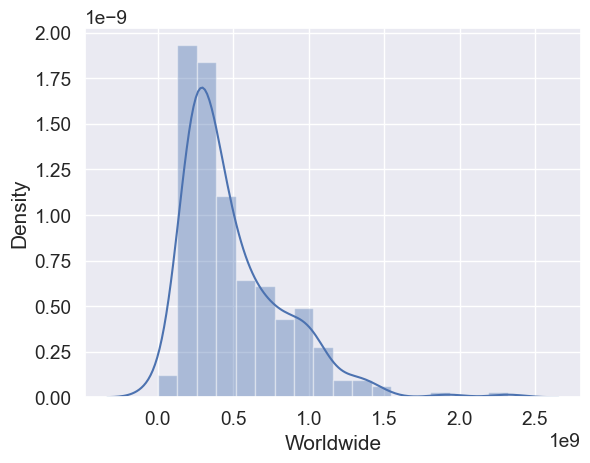

In [429]:
sns.distplot(df5["Worldwide"])

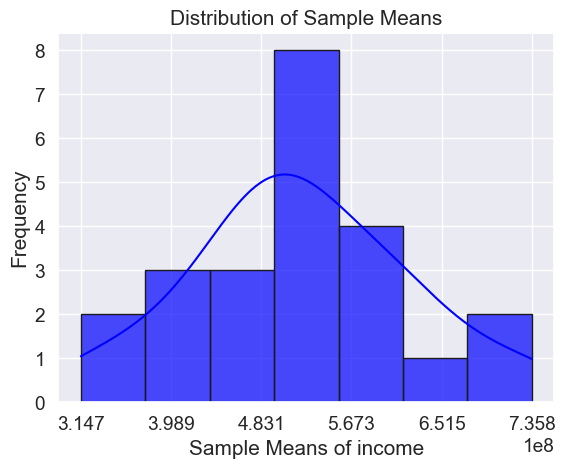

In [460]:
#Implementing clt for getting normal distribution
profit=df5["Worldwide"]
num_samples = 23
sample_size = len(profit) // num_samples
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(profit, sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean) 
sns.histplot(sample_means,bins=7, kde=True,edgecolor='k',color='blue', alpha=0.7)
plt.xlabel('Sample Means of income')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means')
x_ticks = np.linspace(min(sample_means), max(sample_means),6)  
plt.xticks(x_ticks)
plt.show()

In [461]:
shapiro_stat, shapiro_pvalue = stats.shapiro(sample_means)
if shapiro_pvalue < 0.05:
    print("The sample means do not follow a normal distribution.")
else:
    print("The sample means follow a normal distribution.")

The sample means may follow a normal distribution.


In [466]:
len(sample_means)-1 #degrees of freedom

22

In [469]:
Interval1=np.mean(sample_means)-2.0739*(np.std(sample_means)/np.sqrt(len(sample_means)))
Interval1

476767748.396494

In [470]:
Interval2=np.mean(sample_means)+2.0739*(np.std(sample_means)/np.sqrt(len(sample_means)))
Interval2

563648658.1647707

# With a 95% confidence level, it is expected that movies falling within the Adventure and Fantasy genres will likely yield Gross Income falling within the range of 476767748.4 to 563648658.2.

# Hypothesis Testing 

In [198]:
corr=output["Tomatometer"].corr(output["Rotten Tomatos Audience"])
corr

0.7310836328450963

In [199]:
corr=output["wordlwide"].corr(output["IMDB"])
corr

0.20612476734800625

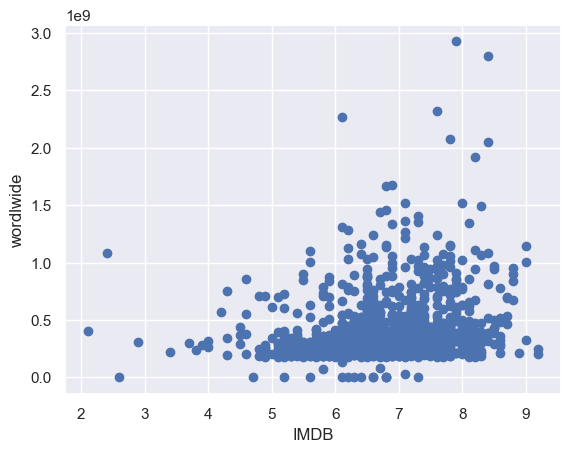

In [207]:
plt.scatter(output["IMDB"], output["wordlwide"])
plt.xlabel("IMDB")  
plt.ylabel("wordlwide")
plt.show()

In [208]:
"We also can observe some kind of relationship between variables. But it is not so strong as its corellation coefficient is only 0.2.It means it is so likely that there are also some values have very good Imdb but didn't make as much as profit as other movies which has less imdb rating."

"We also can observe some kind of relationship between variables. But it is not so strong as its corellation coefficient is only 0.2.It means it is so likely that there are also some values have very good Imdb but didn't make as much as profit as other movies which has less imdb rating."

In [201]:
output[['wordlwide', 'IMDB']].describe()

,wordlwide,IMDB
count,1.000000e+03,1000.000000
mean,4.176985e+08,6.782700
std,3.090752e+08,0.955669
min,4.900000e+01,2.100000
25%,2.264065e+08,6.200000
50%,3.150009e+08,6.800000
75%,4.841999e+08,7.400000
max,2.923706e+09,9.200000


/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_38734/2621387668.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(output["IMDB"])


<Axes: xlabel='IMDB', ylabel='Density'>

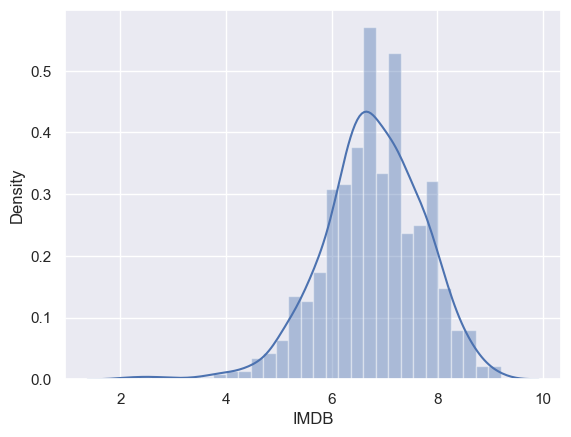

In [206]:
sns.distplot(output["IMDB"])

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_38734/4197834916.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(output['IMDB']).set_title('IMDB Ratings Distribution')
/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_38734/4197834916.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



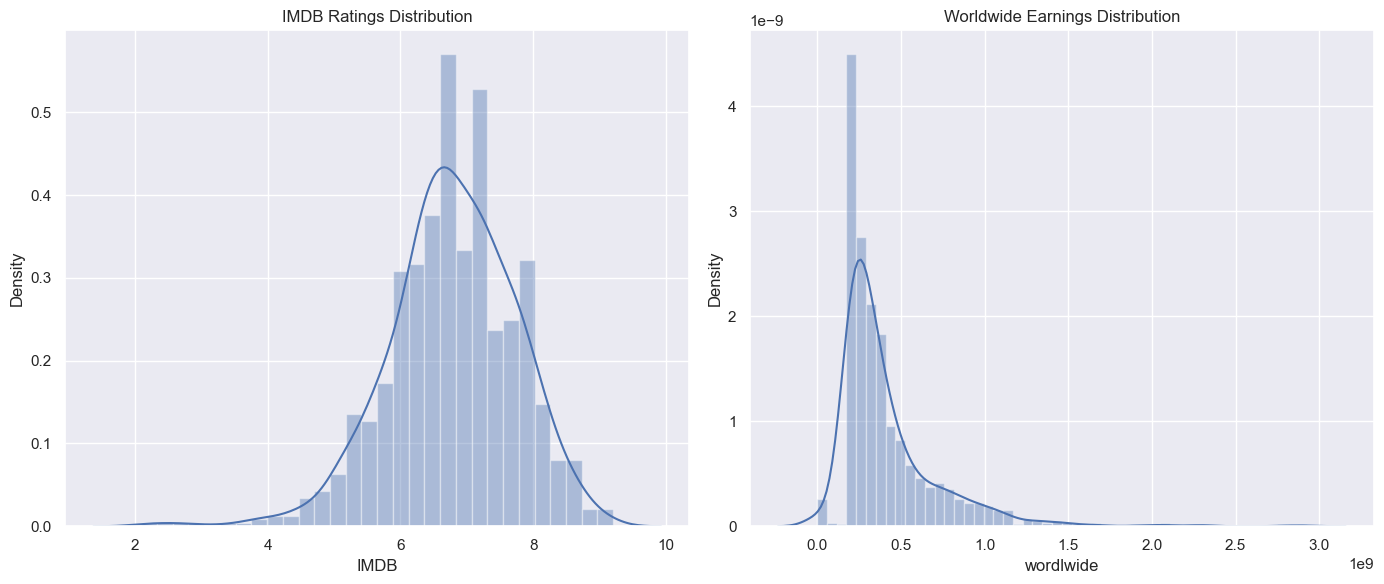

In [211]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  
sns.distplot(output['IMDB']).set_title('IMDB Ratings Distribution')
plt.subplot(1, 2, 2)  
sns.distplot(output['wordlwide']).set_title('Worldwide Earnings Distribution')
plt.tight_layout()
plt.show()

In [205]:
shapiro_stat, shapiro_pvalue = stats.shapiro(output['wordlwide'])
if shapiro_pvalue < 0.05:
    print("The sample means do not follow a normal distribution.")
else:
    print("The sample means follow a normal distribution.")

The sample means do not follow a normal distribution.


In [197]:
""""NULL HYPOTHESIS , THERE IS NO RELATIONSHIP rho=0, Alternative hypothesis , THERE IS A RELATIONSHIP rho!=0"""

'"NULL HYPOTHESIS , THERE IS NO RELATIONSHIP rho=0, Alternative hypothesis , THERE IS A RELATIONSHIP rho!=0'

In [189]:
spearman_corr, spearman_p_value = stats.spearmanr(output['wordlwide'], output['IMDB'])
spearman_corr, spearman_p_value

(0.21925719740733987, 2.3776950612507568e-12)

In [209]:
"""For making sure p-value is correct,  we can calculate t-statistic by ourselves and finding p-value by using t-table."""

'For making sure p-value is correct,  we can calculate t-statistic by ourselves and finding p-value by using t-table.'

In [191]:
n = len(output['wordlwide'])  
rho = spearman_corr  

t_statistic = rho * (np.sqrt((n - 2) / (1 - rho**2)))
t_statistic

7.09933174106636

In [195]:
'''When you look at t-table , You will observe p-value is extremely low and almost impossible to find from table. But with the help of softwate we know the exact number'''

'When you look at t-table , You will observe p-value is extremely low and almost impossible to find from table. But with the help of softwate we know the exact number'

In [212]:
alpha=0.05
spearman_p_value>alpha

False

In [213]:
""" The result indicates that we need to reject null hypothesis at 95% signifance level . It means there is a correlation between the worldwide earnings and IMDB ratings of movies. However, the correlation coefficient of 0.219 suggests that while the correlation is statistically significant, it is weak in strength."""

' The result indicates that we need to reject null hypothesis at 95% signifance level . It means there is a correlation between the worldwide earnings and IMDB ratings of movies. However, the correlation coefficient of 0.219 suggests that while the correlation is statistically significant, it is weak in strength.'